<a href="https://colab.research.google.com/github/sharath1708/dav/blob/main/DAV.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Head of dataset:
             Timestamp   Age Primary streaming service  Hours per day  \
0  8/27/2022 19:29:02  18.0                   Spotify            3.0   
1  8/27/2022 19:57:31  63.0                   Pandora            1.5   
2  8/27/2022 21:28:18  18.0                   Spotify            4.0   
3  8/27/2022 21:40:40  61.0             YouTube Music            2.5   
4  8/27/2022 21:54:47  18.0                   Spotify            4.0   

  While working Instrumentalist Composer         Fav genre Exploratory  \
0           Yes             Yes      Yes             Latin         Yes   
1           Yes              No       No              Rock         Yes   
2            No              No       No  Video game music          No   
3           Yes              No      Yes              Jazz         Yes   
4           Yes              No       No               R&B         Yes   

  Foreign languages  ...  Frequency [R&B]  Frequency [Rap] Frequency [Rock]  \
0               Yes  ... 

<ipython-input-5-d0ee440e4de1>:45: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  print("\nMental health by streaming service:\n", df.groupby('Primary streaming service')[['Anxiety','Depression','Insomnia','OCD']].mean())
<ipython-input-5-d0ee440e4de1>:51: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pivot = pd.pivot_table(df, index='Fav genre', columns='Instrumentalist', values='Anxiety', aggfunc='mean')


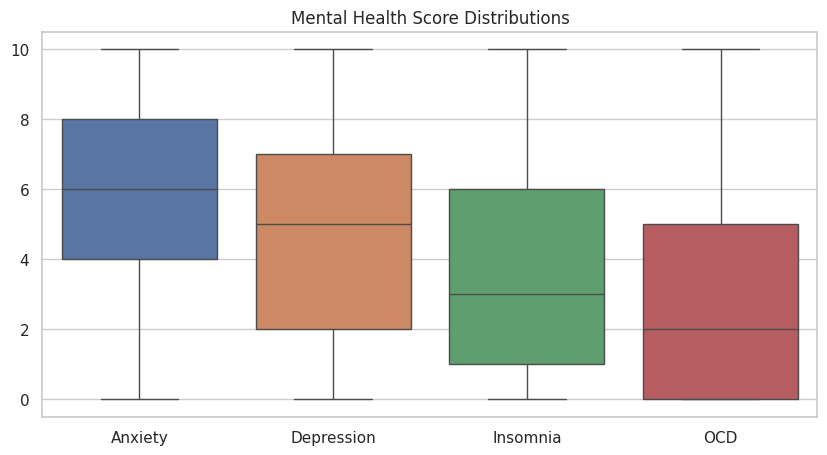

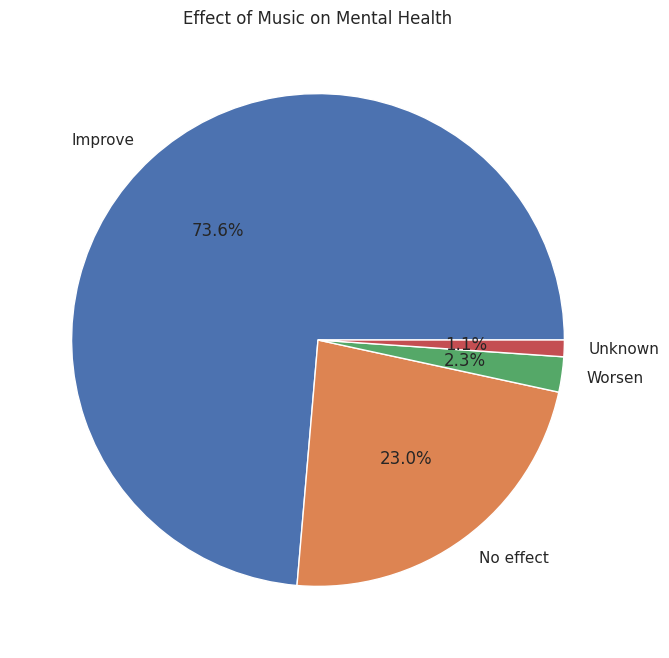

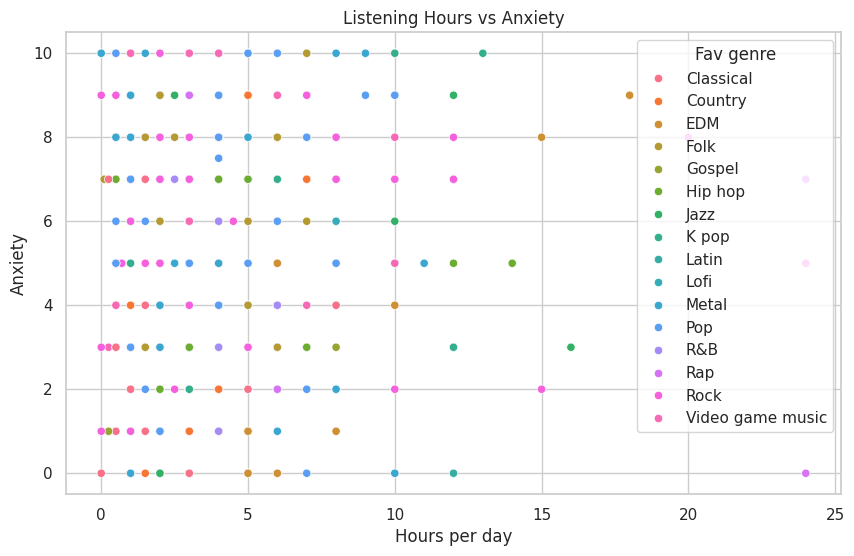

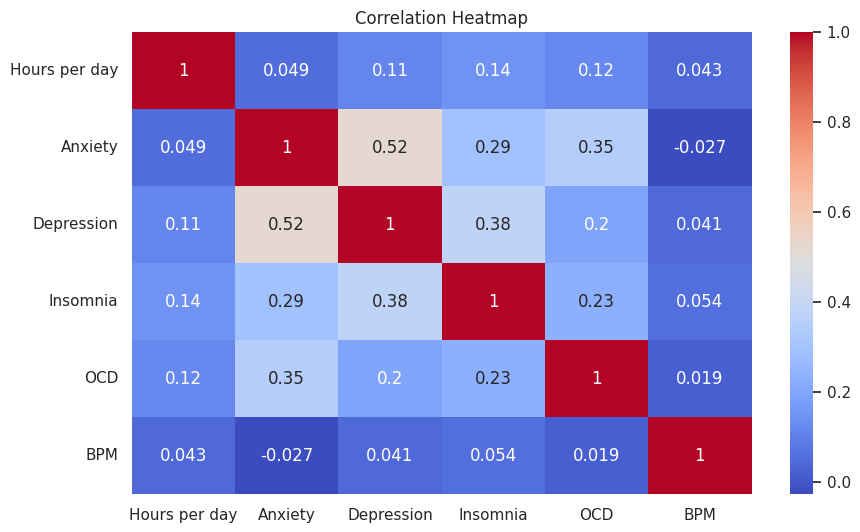

<ipython-input-5-d0ee440e4de1>:84: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  genre_age = pd.pivot_table(df, index='Age group', columns='Fav genre', values='Age', aggfunc='count', fill_value=0)


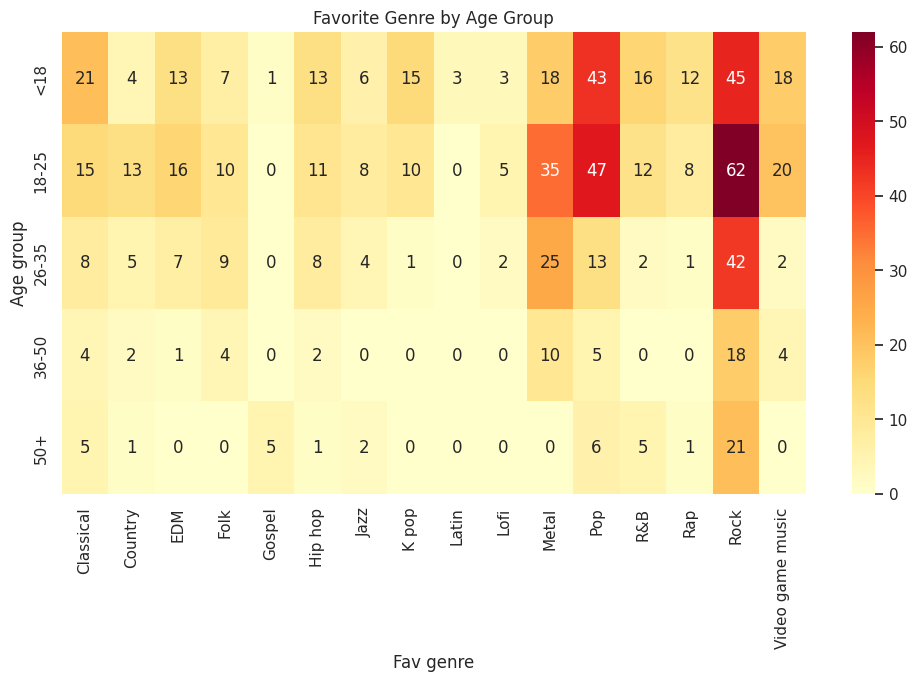

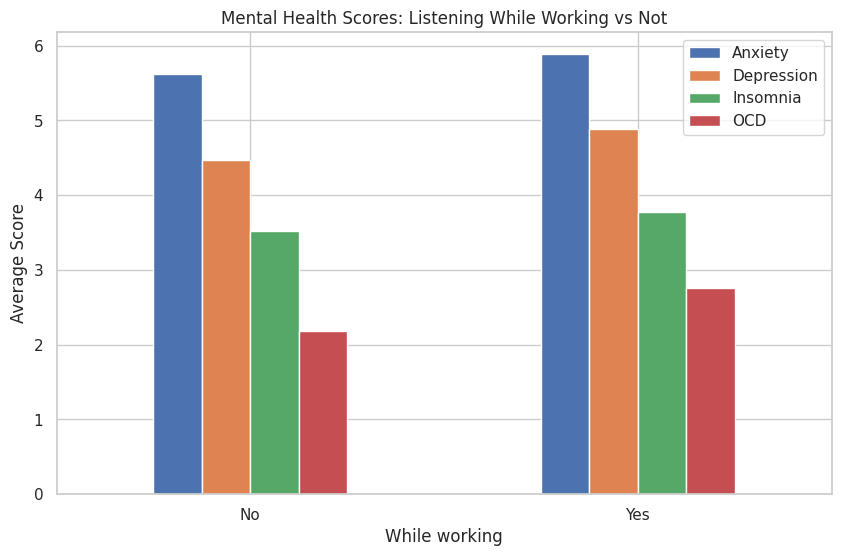

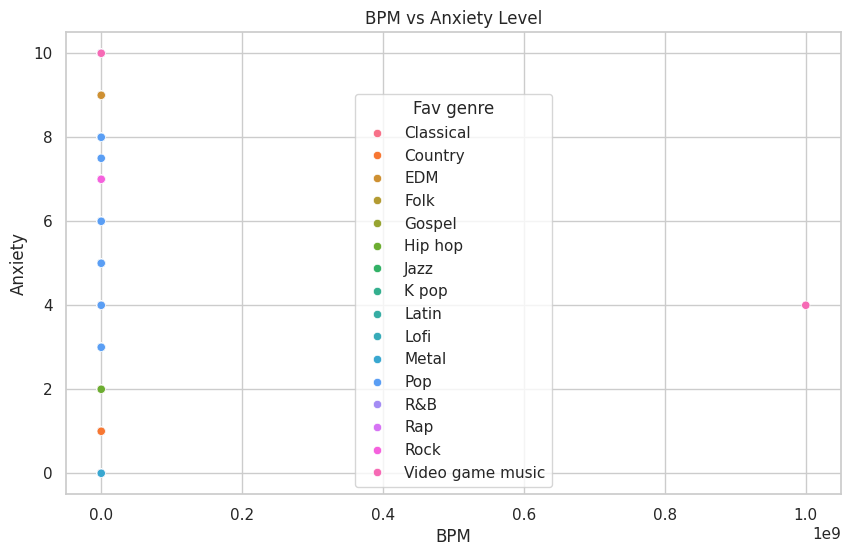

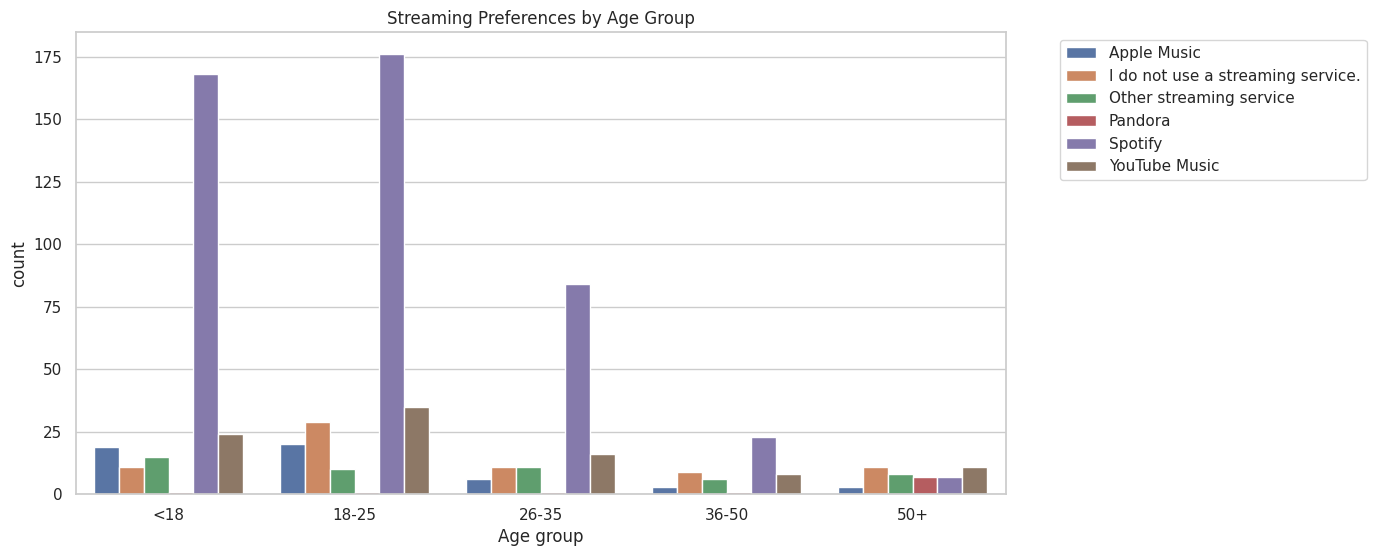


Descriptive stats:
               Age  Hours per day  While working           BPM  \
count  736.000000     736.000000     733.000000  6.290000e+02   
mean    25.201087       3.572758       0.789905  1.589948e+06   
std     12.047764       3.028199       0.407654  3.987261e+07   
min     10.000000       0.000000       0.000000  0.000000e+00   
25%     18.000000       2.000000       1.000000  1.000000e+02   
50%     21.000000       3.000000       1.000000  1.200000e+02   
75%     28.000000       5.000000       1.000000  1.440000e+02   
max     89.000000      24.000000       1.000000  1.000000e+09   

       Frequency [Classical]  Frequency [Country]  Frequency [EDM]  \
count             736.000000           736.000000       736.000000   
mean                1.335598             0.817935         1.023098   
std                 0.988442             0.922584         1.048878   
min                 0.000000             0.000000         0.000000   
25%                 1.000000             0.

<ipython-input-5-d0ee440e4de1>:114: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  print("\nMental health by genre:\n", df.groupby('Fav genre')[['Anxiety', 'Depression', 'Insomnia', 'OCD']].mean().sort_values('Anxiety', ascending=False))
<ipython-input-5-d0ee440e4de1>:116: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  print("\nListening hours vs anxiety groups:\n", df.groupby(pd.cut(df['Anxiety'], [0, 3, 6, 10]))['Hours per day'].mean())


In [5]:
# Install seaborn if not already installed
# !pip install seaborn

# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set visual style
sns.set(style="whitegrid")  # Only this line is enough

# Load Data
df = pd.read_csv('/content/Music_n_Mental_Health_Survey_Results.csv')


# Step 2: Data Inspection
print("Head of dataset:\n", df.head())
print("\nInfo:\n")
df.info()
print("\nMissing values:\n", df.isna().sum())

# Step 3: Data Cleaning
df['Age'] = df['Age'].fillna(np.nanmedian(df['Age']))
df['While working'] = df['While working'].map({'Yes': 1, 'No': 0})
df['Music effects'] = df['Music effects'].fillna('Unknown')
df.drop(columns=['Permissions', 'Timestamp'], inplace=True)

# Frequency mapping
frequency_map = {'Never': 0, 'Rarely': 1, 'Sometimes': 2, 'Very frequently': 3}
for col in df.columns:
    if 'Frequency' in col:
        df[col] = df[col].map(frequency_map)

# Convert to category
for col in ['Instrumentalist', 'Composer', 'Fav genre', 'Primary streaming service']:
    df[col] = df[col].astype('category')

# Step 4: Basic Statistics
print("\nMean age:", np.mean(df['Age']))
print("Median hours/day:", np.median(df['Hours per day']))
print("Std Dev of anxiety:", np.std(df['Anxiety']))

# Groupby Streaming Service
print("\nMental health by streaming service:\n", df.groupby('Primary streaming service')[['Anxiety','Depression','Insomnia','OCD']].mean())

# Heavy listeners
print("\nHeavy listeners count (>8 hrs):", len(df[df['Hours per day'] > 8]))

# Pivot Table
pivot = pd.pivot_table(df, index='Fav genre', columns='Instrumentalist', values='Anxiety', aggfunc='mean')
print("\nAnxiety by genre and instrumentalist:\n", pivot)

# Step 5: Visualizations

# Boxplot of mental health scores
plt.figure(figsize=(10, 5))
sns.boxplot(data=df[['Anxiety', 'Depression', 'Insomnia', 'OCD']])
plt.title("Mental Health Score Distributions")
plt.show()

# Pie chart of music effects
plt.figure(figsize=(8, 8))
df['Music effects'].value_counts().plot.pie(autopct='%1.1f%%')
plt.title("Effect of Music on Mental Health")
plt.ylabel('')
plt.show()

# Scatter: Hours vs Anxiety
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Hours per day', y='Anxiety', hue='Fav genre', data=df)
plt.title("Listening Hours vs Anxiety")
plt.show()

# Heatmap of correlations
plt.figure(figsize=(10, 6))
corr = df[['Hours per day', 'Anxiety', 'Depression', 'Insomnia', 'OCD', 'BPM']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

# Heatmap: Genre vs Age Group
df['Age group'] = pd.cut(df['Age'], bins=[0, 18, 25, 35, 50, 100], labels=['<18', '18-25', '26-35', '36-50', '50+'])
genre_age = pd.pivot_table(df, index='Age group', columns='Fav genre', values='Age', aggfunc='count', fill_value=0)

plt.figure(figsize=(12, 6))
sns.heatmap(genre_age, annot=True, fmt='d', cmap='YlOrRd')
plt.title("Favorite Genre by Age Group")
plt.show()

# Bar: Working vs Mental Health
df.groupby('While working')[['Anxiety', 'Depression', 'Insomnia', 'OCD']].mean().plot(kind='bar', figsize=(10, 6))
plt.title("Mental Health Scores: Listening While Working vs Not")
plt.xticks([0, 1], ['No', 'Yes'], rotation=0)
plt.ylabel("Average Score")
plt.show()

# Scatter: BPM vs Anxiety
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='BPM', y='Anxiety', hue='Fav genre')
plt.title("BPM vs Anxiety Level")
plt.show()

# Countplot: Streaming Service by Age
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='Age group', hue='Primary streaming service')
plt.title("Streaming Preferences by Age Group")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

# Step 6: Summary Stats
print("\nDescriptive stats:\n", df.describe())

print("\nMental health by genre:\n", df.groupby('Fav genre')[['Anxiety', 'Depression', 'Insomnia', 'OCD']].mean().sort_values('Anxiety', ascending=False))

print("\nListening hours vs anxiety groups:\n", df.groupby(pd.cut(df['Anxiety'], [0, 3, 6, 10]))['Hours per day'].mean())

